Importing Packages

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from gensim.models import Word2Vec
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Loading Data

In [2]:
kabikit = pd.read_csv("data\\kabitakitchen.csv", encoding='unicode-escape')
nisha = pd.read_csv("data\\Nishafin.csv")

In [3]:
for col in kabikit.columns:
    print(col, kabikit[col].count())
kabikit.head()

id 4900
commentText 4900
Labels 4900
Encoded 4900


,id,commentText,Labels,Encoded
0,Ugy_CBm-_CKA3YqrzcB4AaABAg,Pudina ptta nhi dalu to,7,1
1,Ugy9mx9nuTWJu4dRac14AaABAg,Chiken kacha tu ni rhy ga sis,7,1
2,Ugz8T2MKLYucL3dM9nh4AaABAg,"Hello mam, I love your all recipes.... ðð...",4,0
3,Ugx_1cCjRbCaDgL0FLF4AaABAg,Its awesome recipe plzz make handi chicken in ...,2,0
4,UgzLhKVAJ6NN3nZXyjN4AaABAg,Yeh jo measurement hai.........kitne logon ke ...,7,1


In [4]:
for col in nisha.columns:
    print(col, nisha[col].count())
nisha.head()

id 4900
commentText 4900
Labels 4900
Encoded 4900


,id,commentText,Labels,Encoded
0,Ugz7LQV0ZWpuNnjBaxJ4AaABAg,i love potato ke prathe,2,0
1,UgxvWJ_kJL2nePTkg2N4AaABAg,Wwaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaww,3,0
2,UgxxeUmiH9f8XOZZWr14AaABAg,Nice,3,0
3,Ugz-UPvwHMx4nSKVoCB4AaABAg,Wow Amazing,3,0
4,UgzfXhbesBABQzi4-m94AaABAg,Thank you madam,1,0


Pre-Processing

In [5]:
def preprocess_input(text):
    # remove smiley if any
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

    text = emoji_pattern.sub(r'', text)
    prep_text = text.lower()
    
    #remove hyperlinks
    prep_text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', prep_text)
    #removing text inside ()
    prep_text = re.sub(r'\([^)]*\)', '', prep_text)
    #removing text inside []
    prep_text = re.sub(r'\{[^)]*\}', '', prep_text)
    #fetching alphabetic characters
    prep_text = re.sub("[^a-zA-Z]", " ", prep_text)
    #removing stop words
    stopWEn = stopwords.words('english')
    tokens = [w for w in prep_text.split() if not w in stopWEn] 
    fin_words = [i for i in tokens if len(i)>=4]
    #return " ".join(prep_text.split())
    return (" ".join(fin_words)).strip()

In [6]:
kabikit['commentText'] = kabikit['commentText'].astype(str)
kabikit['Labels'] = kabikit['Labels'].astype(int)
kabikit['Labels'] = kabikit['Labels'].astype(int)
kabikit['Labels'] = kabikit['Labels'].apply(lambda x : x-1)
kabikit['prep_text'] = kabikit['commentText'].apply(preprocess_input)
kabikit.head()

,id,commentText,Labels,Encoded,prep_text
0,Ugy_CBm-_CKA3YqrzcB4AaABAg,Pudina ptta nhi dalu to,6,1,pudina ptta dalu
1,Ugy9mx9nuTWJu4dRac14AaABAg,Chiken kacha tu ni rhy ga sis,6,1,chiken kacha
2,Ugz8T2MKLYucL3dM9nh4AaABAg,"Hello mam, I love your all recipes.... ðð...",3,0,hello love recipes ingredients easily availabl...
3,Ugx_1cCjRbCaDgL0FLF4AaABAg,Its awesome recipe plzz make handi chicken in ...,1,0,awesome recipe plzz make handi chicken handi
4,UgzLhKVAJ6NN3nZXyjN4AaABAg,Yeh jo measurement hai.........kitne logon ke ...,6,1,measurement kitne logon liye


In [7]:
nisha['commentText'] = nisha['commentText'].astype(str)
nisha['Labels'] = nisha['Labels'].astype(int)
nisha['Labels'] = nisha['Labels'].astype(int)
nisha['Labels'] = nisha['Labels'].apply(lambda x : x-1)
nisha['prep_text'] = nisha['commentText'].apply(preprocess_input)
nisha.head()

,id,commentText,Labels,Encoded,prep_text
0,Ugz7LQV0ZWpuNnjBaxJ4AaABAg,i love potato ke prathe,1,0,love potato prathe
1,UgxvWJ_kJL2nePTkg2N4AaABAg,Wwaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaww,2,0,wwaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaww
2,UgxxeUmiH9f8XOZZWr14AaABAg,Nice,2,0,nice
3,Ugz-UPvwHMx4nSKVoCB4AaABAg,Wow Amazing,2,0,amazing
4,UgzfXhbesBABQzi4-m94AaABAg,Thank you madam,0,0,thank madam


5    701
6    700
3    700
1    700
4    700
2    700
0    699
Name: Labels, dtype: int64


C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Labels'>

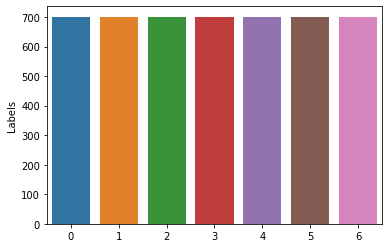

In [8]:
x=kabikit['Labels'].value_counts()
print(x)
sns.barplot(x.index,x)

1    700
2    700
0    700
3    700
5    700
6    700
4    700
Name: Labels, dtype: int64


C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Labels'>

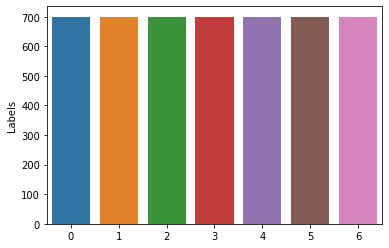

In [9]:
x=nisha['Labels'].value_counts()
print(x)
sns.barplot(x.index,x)

In [10]:
#1. WORD-COUNT
kabikit['word_count'] = kabikit['prep_text'].apply(lambda x: len(str(x).split()))
nisha['word_count'] = nisha['prep_text'].apply(lambda x: len(str(x).split()))

#2. CHARACTER-COUNT
kabikit['char_count'] = kabikit['prep_text'].apply(lambda x: len(str(x)))
nisha['char_count'] = nisha['prep_text'].apply(lambda x: len(str(x)))

#3. UNIQUE WORD-COUNT
kabikit['unique_word_count'] = kabikit['prep_text'].apply(lambda x: len(set(str(x).split())))
nisha['unique_word_count'] = nisha['prep_text'].apply(lambda x: len(set(str(x).split())))

In [11]:
kabikit.head()

,id,commentText,Labels,Encoded,prep_text,word_count,char_count,unique_word_count
0,Ugy_CBm-_CKA3YqrzcB4AaABAg,Pudina ptta nhi dalu to,6,1,pudina ptta dalu,3,16,3
1,Ugy9mx9nuTWJu4dRac14AaABAg,Chiken kacha tu ni rhy ga sis,6,1,chiken kacha,2,12,2
2,Ugz8T2MKLYucL3dM9nh4AaABAg,"Hello mam, I love your all recipes.... ðð...",3,0,hello love recipes ingredients easily availabl...,8,63,8
3,Ugx_1cCjRbCaDgL0FLF4AaABAg,Its awesome recipe plzz make handi chicken in ...,1,0,awesome recipe plzz make handi chicken handi,7,44,6
4,UgzLhKVAJ6NN3nZXyjN4AaABAg,Yeh jo measurement hai.........kitne logon ke ...,6,1,measurement kitne logon liye,4,28,4


In [12]:
nisha.head()

,id,commentText,Labels,Encoded,prep_text,word_count,char_count,unique_word_count
0,Ugz7LQV0ZWpuNnjBaxJ4AaABAg,i love potato ke prathe,1,0,love potato prathe,3,18,3
1,UgxvWJ_kJL2nePTkg2N4AaABAg,Wwaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaww,2,0,wwaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaww,1,49,1
2,UgxxeUmiH9f8XOZZWr14AaABAg,Nice,2,0,nice,1,4,1
3,Ugz-UPvwHMx4nSKVoCB4AaABAg,Wow Amazing,2,0,amazing,1,7,1
4,UgzfXhbesBABQzi4-m94AaABAg,Thank you madam,0,0,thank madam,2,11,2


Spliting Data for training and testing

In [13]:

trainD, testD= train_test_split(kabikit, test_size=0.2, random_state=50, stratify=kabikit['Labels'])
trainDN, testDN= train_test_split(nisha, test_size=0.2, random_state=50, stratify=nisha['Labels'])


In [14]:
x_train = trainD['prep_text']
y_train = trainD['Labels']
x_test = testD['prep_text']
y_test = testD['Labels']

x_ntrain = trainDN['prep_text']
y_ntrain = trainDN['Labels']
x_ntest = testDN['prep_text']
y_ntest = testDN['Labels']

TF-IDF Transformation

In [15]:
veck = TfidfVectorizer()
veck.fit(kabikit['prep_text'])
print("TF-IDF on Kabita : ",len(veck.vocabulary_))
vecn = TfidfVectorizer()
vecn.fit(nisha['prep_text'])
print("TF-IDF on Nisha : ",len(vecn.vocabulary_))

TF-IDF on Kabita :  3882
TF-IDF on Nisha :  4310


In [16]:
x_train_tfid = veck.transform(x_train)
x_test_tfid = veck.transform(x_test)
print(x_train_tfid.shape)
x_ntrain_tfid = vecn.transform(x_ntrain)
x_ntest_tfid = vecn.transform(x_ntest)
print(x_ntrain_tfid.shape)

(3920, 3882)
(3920, 4310)


In [17]:
tfidfk = dict(zip(veck.get_feature_names(), veck.idf_))
tfidfn = dict(zip(vecn.get_feature_names(), vecn.idf_))
tfidfk = pd.DataFrame(columns=['tfidf']).from_dict(tfidfk, orient='index')
tfidfn = pd.DataFrame(columns=['tfidf']).from_dict(tfidfn, orient='index')
tfidfk.columns = ['tfidf']
tfidfn.columns = ['tfidf']

C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Naive Bayes Algorithm

In [18]:
#on Kabita Data
nb_clf = MultinomialNB()
nb_clf.fit(x_train_tfid, y_train)
y_pred = nb_clf.predict(x_test_tfid)
print(classification_report(y_test, y_pred))
print("Naive Bayes Accuracy On kabikit :  ",accuracy_score(y_test,y_pred))
nb_k = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       140
           1       0.83      0.71      0.76       140
           2       0.75      0.81      0.78       140
           3       0.72      0.73      0.72       140
           4       0.54      0.69      0.60       140
           5       0.61      0.44      0.51       140
           6       0.71      0.86      0.78       140

    accuracy                           0.71       980
   macro avg       0.72      0.71      0.71       980
weighted avg       0.72      0.71      0.71       980

Naive Bayes Accuracy On kabikit :   0.7071428571428572


In [19]:
#on Nisha Data
nb_clfn = MultinomialNB()
nb_clfn.fit(x_ntrain_tfid, y_ntrain)
y_npred = nb_clfn.predict(x_ntest_tfid)
print(classification_report(y_ntest, y_npred))
print("Naive Bayes Accuracy On Nisha :  ",accuracy_score(y_ntest,y_npred))
nb_n = accuracy_score(y_ntest,y_npred)

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       140
           1       0.75      0.66      0.70       140
           2       0.71      0.76      0.73       140
           3       0.66      0.64      0.65       140
           4       0.49      0.67      0.56       140
           5       0.69      0.33      0.44       140
           6       0.77      0.84      0.81       140

    accuracy                           0.66       980
   macro avg       0.67      0.66      0.65       980
weighted avg       0.67      0.66      0.65       980

Naive Bayes Accuracy On Nisha :   0.6581632653061225


SVM Model

In [20]:
#Kabita Data
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(x_train_tfid,y_train)
y_pred = svm_clf.predict(x_test_tfid)
print(classification_report(y_test, y_pred))
print("svm Accuracy on kabikit : ", accuracy_score(y_test,y_pred))
svm_k = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       140
           1       0.81      0.75      0.78       140
           2       0.85      0.86      0.86       140
           3       0.71      0.66      0.68       140
           4       0.80      0.59      0.68       140
           5       0.46      0.71      0.56       140
           6       0.77      0.76      0.76       140

    accuracy                           0.73       980
   macro avg       0.76      0.73      0.73       980
weighted avg       0.76      0.73      0.73       980

svm Accuracy on kabikit :  0.7285714285714285


In [21]:
#Nisha Data
svm_clfn = svm.SVC()
svm_clfn.fit(x_ntrain_tfid,y_train)
y_npred = svm_clfn.predict(x_ntest_tfid)
print(classification_report(y_ntest, y_npred))
print("svm Accuracy on kabikit : ", accuracy_score(y_ntest,y_npred))
svm_n = accuracy_score(y_ntest,y_pred)

              precision    recall  f1-score   support

           0       0.86      0.69      0.76       140
           1       0.79      0.76      0.78       140
           2       0.87      0.82      0.85       140
           3       0.63      0.68      0.66       140
           4       0.65      0.55      0.60       140
           5       0.51      0.79      0.62       140
           6       0.84      0.69      0.76       140

    accuracy                           0.71       980
   macro avg       0.74      0.71      0.72       980
weighted avg       0.74      0.71      0.72       980

svm Accuracy on kabikit :  0.7112244897959183


Random Forest Classifier

In [22]:
#Kabita Data
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_tfid,y_train)
y_pred = rf_clf.predict(x_test_tfid)
print(classification_report(y_test, y_pred))
print("Random Forest Classifier Accuracy on kabikit : ",accuracy_score(y_test,y_pred))
rf_k = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       140
           1       0.81      0.79      0.80       140
           2       0.55      0.95      0.70       140
           3       0.69      0.58      0.63       140
           4       0.82      0.61      0.70       140
           5       0.61      0.46      0.53       140
           6       0.72      0.74      0.73       140

    accuracy                           0.71       980
   macro avg       0.72      0.71      0.70       980
weighted avg       0.72      0.71      0.70       980

Random Forest Classifier Accuracy on kabikit :  0.7051020408163265


In [23]:
#Nisha Data
rf_clfn = RandomForestClassifier()
rf_clfn.fit(x_ntrain_tfid,y_train)
y_npred = rf_clfn.predict(x_ntest_tfid)
print(classification_report(y_ntest, y_npred))
print("Random Forest Classifier Accuracy on kabikit : ",accuracy_score(y_ntest,y_npred))
rf_n = accuracy_score(y_ntest,y_npred)

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       140
           1       0.76      0.76      0.76       140
           2       0.62      0.91      0.74       140
           3       0.61      0.61      0.61       140
           4       0.70      0.49      0.57       140
           5       0.55      0.50      0.52       140
           6       0.83      0.76      0.79       140

    accuracy                           0.68       980
   macro avg       0.69      0.68      0.68       980
weighted avg       0.69      0.68      0.68       980

Random Forest Classifier Accuracy on kabikit :  0.6826530612244898


Logistic Regression Model

In [24]:
#Kabita Data
#from sklearn.linear_model import LogisticRegression
lrk = LogisticRegression()
lrk.fit(x_train_tfid,y_train)
y_pred = lrk.predict(x_test_tfid)
print(classification_report(y_test, y_pred))
print("Logistic Regression Accuracy : ",accuracy_score(y_test,y_pred))
lr_k = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       140
           1       0.81      0.76      0.78       140
           2       0.87      0.83      0.85       140
           3       0.73      0.68      0.70       140
           4       0.82      0.54      0.65       140
           5       0.49      0.74      0.59       140
           6       0.73      0.76      0.75       140

    accuracy                           0.73       980
   macro avg       0.76      0.73      0.74       980
weighted avg       0.76      0.73      0.74       980

Logistic Regression Accuracy :  0.7336734693877551


In [25]:
#Nisha Data
lrn = LogisticRegression()
lrn.fit(x_ntrain_tfid,y_train)
y_npred = lrn.predict(x_ntest_tfid)
print(classification_report(y_ntest, y_npred))
print("Logistic Regression Accuracy : ",accuracy_score(y_ntest,y_npred))
lr_n = accuracy_score(y_ntest,y_npred)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       140
           1       0.75      0.72      0.74       140
           2       0.78      0.77      0.78       140
           3       0.62      0.64      0.63       140
           4       0.69      0.50      0.58       140
           5       0.50      0.75      0.60       140
           6       0.84      0.74      0.78       140

    accuracy                           0.69       980
   macro avg       0.71      0.69      0.70       980
weighted avg       0.71      0.69      0.70       980

Logistic Regression Accuracy :  0.6948979591836735


Plotting Accuracy Score

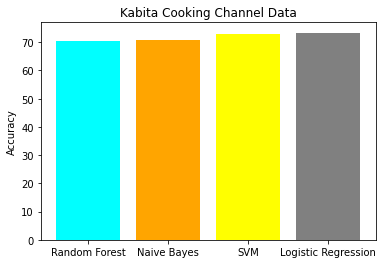

In [26]:
kabikit_acc = {'Random Forest':rf_k*100, 'Naive Bayes':nb_k*100, 'SVM':svm_k*100, 'Logistic Regression':lr_k*100}
nisha_acc = {'Random Forest':rf_n*100, 'Naive Bayes':nb_n*100, 'SVM':svm_n*100, 'Logistic Regression':lr_n*100}

plt.bar(x=kabikit_acc.keys(),height=kabikit_acc.values(), color=['cyan','orange','yellow','grey'])
plt.ylabel("Accuracy")
plt.title('Kabita Cooking Channel Data')
plt.show()

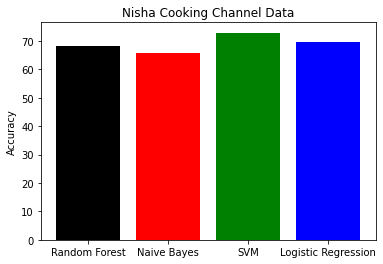

In [27]:
plt.bar(x=nisha_acc.keys(), height=nisha_acc.values(), color=['black','red','green','blue'])
plt.title('Nisha Cooking Channel Data')
plt.ylabel('Accuracy')
plt.show()

Word2vec Transformation

In [28]:
text_k = [i.split() for i in kabikit['prep_text']]
wvmodel_k = Word2Vec(text_k, min_count=1)
w2v_k = {}
for i in wvmodel_k.wv.index_to_key:
    w2v_k[i] = wvmodel_k.wv.get_vector(i)

In [29]:
text_n = [i.split() for i in nisha['prep_text']]
wvmodel_n = Word2Vec(text_n, min_count=1)
w2v_n = {}
for i in wvmodel_n.wv.index_to_key:
    w2v_k[i] = wvmodel_n.wv.get_vector(i)

In [30]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec, w2v):
        self.word2vec = word2vec
        self.w2v = w2v
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = word2vec.vector_size

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v.keys()]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [31]:
modelE = MeanEmbeddingVectorizer(wvmodel_k,w2v_k)
x_train_vec = modelE.transform([nltk.word_tokenize(i) for i in x_train])
x_test_vec = modelE.transform([nltk.word_tokenize(i) for i in x_test])

In [32]:
modelEN = MeanEmbeddingVectorizer(wvmodel_n,w2v_n)
x_train_vecn = modelEN.transform([nltk.word_tokenize(i) for i in x_train])
x_test_vecn = modelEN.transform([nltk.word_tokenize(i) for i in x_test])

Logistic Regression

In [33]:
#Kabita Data
lrk = LogisticRegression()
lrk.fit(x_train_vec,y_train)
y_pred = lrk.predict(x_test_vec)
print(classification_report(y_test, y_pred))
print("Logistic Regression Accuracy : ",accuracy_score(y_test,y_pred))
lr_vk = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.28      0.51      0.36       140
           1       0.27      0.22      0.24       140
           2       0.63      0.52      0.57       140
           3       0.20      0.15      0.17       140
           4       0.53      0.06      0.11       140
           5       0.29      0.60      0.39       140
           6       0.44      0.25      0.32       140

    accuracy                           0.33       980
   macro avg       0.38      0.33      0.31       980
weighted avg       0.38      0.33      0.31       980

Logistic Regression Accuracy :  0.33163265306122447


In [34]:
#Nisha Data
lrn = LogisticRegression()
lrn.fit(x_train_vecn,y_train)
y_npred = lrn.predict(x_test_vecn)
print(classification_report(y_ntest, y_npred))
print("Logistic Regression Accuracy : ",accuracy_score(y_ntest,y_npred))
lr_vn = accuracy_score(y_ntest,y_npred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.00      0.00      0.00       140
           2       0.00      0.00      0.00       140
           3       0.00      0.00      0.00       140
           4       0.00      0.00      0.00       140
           5       0.14      1.00      0.25       140
           6       0.00      0.00      0.00       140

    accuracy                           0.14       980
   macro avg       0.02      0.14      0.04       980
weighted avg       0.02      0.14      0.04       980

Logistic Regression Accuracy :  0.14285714285714285


C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Random Forest Classifier

In [35]:
#kabita Data
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_vec,y_train)
y_pred = rf_clf.predict(x_test_vec)
print(classification_report(y_test, y_pred))
print("Random Forest Classifier Accuracy on kabikit : ",accuracy_score(y_test,y_pred))
rf_vk = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.71      0.49      0.58       140
           1       0.78      0.57      0.66       140
           2       0.83      0.88      0.85       140
           3       0.47      0.41      0.44       140
           4       0.51      0.64      0.57       140
           5       0.39      0.44      0.42       140
           6       0.43      0.54      0.48       140

    accuracy                           0.57       980
   macro avg       0.59      0.57      0.57       980
weighted avg       0.59      0.57      0.57       980

Random Forest Classifier Accuracy on kabikit :  0.5683673469387756


In [36]:
#Nisha Data
rf_clfn = RandomForestClassifier()
rf_clfn.fit(x_train_vecn,y_train)
y_npred = rf_clfn.predict(x_test_vecn)
print(classification_report(y_ntest, y_npred))
print("Random Forest Classifier Accuracy on nisha : ",accuracy_score(y_ntest,y_npred))
rf_vn = accuracy_score(y_ntest,y_npred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.00      0.00      0.00       140
           2       0.00      0.00      0.00       140
           3       0.00      0.00      0.00       140
           4       0.14      1.00      0.25       140
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       140

    accuracy                           0.14       980
   macro avg       0.02      0.14      0.04       980
weighted avg       0.02      0.14      0.04       980

Random Forest Classifier Accuracy on nisha :  0.14285714285714285


C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

SVM Model

In [37]:
#Kabita Data
svm_clf = svm.SVC()
svm_clf.fit(x_train_vec,y_train)
y_pred = svm_clf.predict(x_test_vec)
print(classification_report(y_test, y_pred))
print("svm Accuracy on kabikit : ", accuracy_score(y_test,y_pred))
svm_vk = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.66      0.31      0.42       140
           1       0.49      0.41      0.44       140
           2       0.96      0.48      0.64       140
           3       0.23      0.11      0.15       140
           4       0.30      0.54      0.39       140
           5       0.43      0.34      0.38       140
           6       0.30      0.66      0.42       140

    accuracy                           0.41       980
   macro avg       0.48      0.41      0.40       980
weighted avg       0.48      0.41      0.40       980

svm Accuracy on kabikit :  0.4051020408163265


In [38]:
#Nisha Data
svm_clfn = svm.SVC()
svm_clfn.fit(x_train_vecn,y_train)
y_npred = svm_clfn.predict(x_test_vecn)
print(classification_report(y_ntest, y_npred))
print("svm Accuracy on nisha : ", accuracy_score(y_ntest,y_npred))
svm_vn = accuracy_score(y_ntest,y_npred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.00      0.00      0.00       140
           2       0.00      0.00      0.00       140
           3       0.00      0.00      0.00       140
           4       0.00      0.00      0.00       140
           5       0.14      1.00      0.25       140
           6       0.00      0.00      0.00       140

    accuracy                           0.14       980
   macro avg       0.02      0.14      0.04       980
weighted avg       0.02      0.14      0.04       980

svm Accuracy on nisha :  0.14285714285714285


C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Plotting Accuracy Score

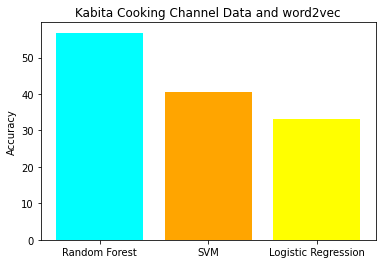

In [39]:
kabikit_vacc = {'Random Forest':rf_vk*100, 'SVM':svm_vk*100, 'Logistic Regression':lr_vk*100}
nisha_vacc = {'Random Forest':rf_vn*100, 'SVM':svm_vn*100, 'Logistic Regression':lr_vn*100}

plt.bar(x=kabikit_vacc.keys(),height=kabikit_vacc.values(), color=['cyan','orange','yellow','grey'])
plt.ylabel("Accuracy")
plt.title('Kabita Cooking Channel Data and word2vec')
plt.show()

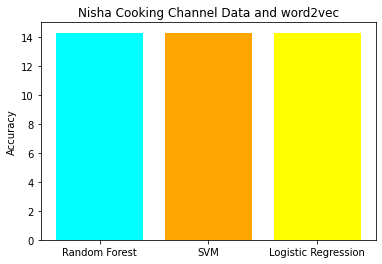

In [40]:
plt.bar(x=nisha_vacc.keys(),height=nisha_vacc.values(), color=['cyan','orange','yellow','grey'])
plt.ylabel("Accuracy")
plt.title('Nisha Cooking Channel Data and word2vec')
plt.show()